<a href="https://www.kaggle.com/code/ibrahimfe/face-mask-classification-with-svm?scriptVersionId=154229682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-types-dataset/Dataset/test/n95/369.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/355.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/377.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/366.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/359.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/361.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/380.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/379.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/375.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/396.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/362.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/372.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/388.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/374.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/368.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [48]:
DATADIR = '/kaggle/input/face-mask-types-dataset/Dataset/train'
CATEGORIES = ['cloth', 'n95', 'n95v', 'nfm', 'srg']
IMG_SIZE = 300

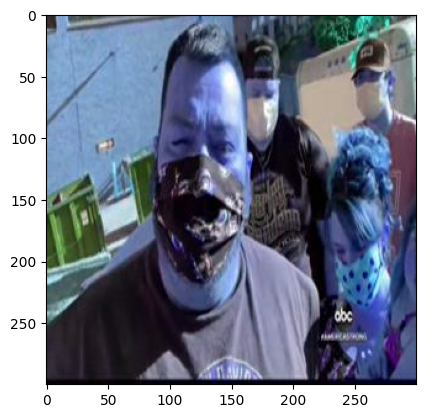

In [49]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [50]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
#                 img_array=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [51]:
print(len(training_data))

1956


In [52]:
lenofimage = len(training_data)

In [53]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [54]:
X.shape

(1956, 270000)

In [55]:
X = X/255.0

In [56]:
X[1]

array([0.23921569, 0.43921569, 0.45098039, ..., 0.77254902, 0.7372549 ,
       0.78823529])

In [57]:
y = np.array(y)

In [58]:
y.shape

(1956,)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [60]:
# Create the parameter grid based on the results of random search 
# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 'auto', 'scale'],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'gamma':['auto', 'scale']}]

In [61]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Latih model SVM dengan data yang diperoleh
start_time = time.time()
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)
# svm_model = GridSearchCV(SVC(), params_grid, cv=5)
# svm_model.fit(X_train, y_train)

end_time = time.time()

# Hitung lama waktu training
training_time = end_time - start_time
print("Training time: {} seconds".format(training_time))

Training time: 142.28371334075928 seconds


In [62]:
y2 = svc.predict(X_test)
y = svc.predict(X_train)

In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(y_test,y2))
print("Accuracy is", accuracy_score(y_train, y))

Accuracy is 0.6175869120654397
Accuracy is 1.0


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       100
           1       0.56      0.52      0.54        84
           2       0.58      0.56      0.57        99
           3       0.83      0.80      0.81       119
           4       0.54      0.55      0.55        87

    accuracy                           0.62       489
   macro avg       0.61      0.61      0.61       489
weighted avg       0.62      0.62      0.62       489



In [65]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

result

,original,predicted
0,0,0
1,3,3
2,4,4
3,2,1
4,0,0
...,...,...
484,3,3
485,3,3
486,1,2
487,2,1


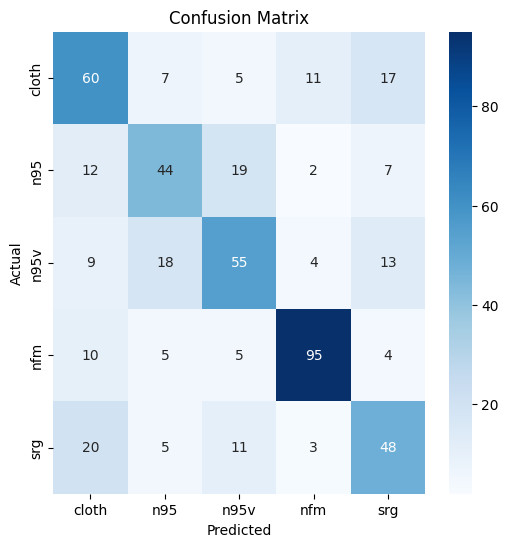

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'], yticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

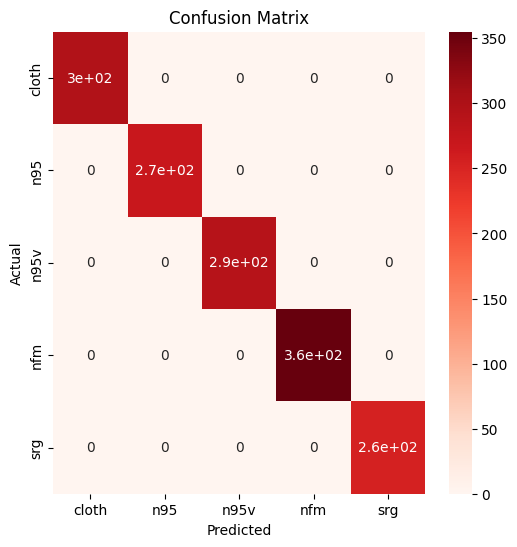

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'], yticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()